In [2]:
import csv
import pandas as pd
import numpy as np
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

from scipy.stats import linregress
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
df = pd.read_csv("../../../data/processed/lem_stem_4000_best_features.csv")

display(df.head())


,ability,able,absolute,absolutely,absorb,abuse,ac,accept,acceptable,accepted,...,yr,yuck,yucky,yup,zero,zip,ziplock,zipper,zone,overall.1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [3]:
df = df.dropna(subset='overall.1')

features = df.iloc[:, :-1]
target = df.iloc[:, -1]

print(features.shape)
print(target.shape)

(602453, 3931)
(602453,)


In [4]:
target.isna().sum()

0

In [5]:
features = features.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [17]:
logistic_model = LogisticRegression(solver='saga')
logistic_model.fit(X_train, y_train)


In [ ]:
log_y_pred_train = logistic_model.predict(X_train)
log_y_pred_test = logistic_model.predict(X_test)

In [ ]:
logistic_report_train = classification_report_imbalanced(y_train, log_y_pred_train)
logistic_report_test = classification_report_imbalanced(y_test, log_y_pred_test)
print(logistic_report_train)
print(logistic_report_test)


In [ ]:
accuracy_train_logistic = accuracy_score(y_train, log_y_pred_train)
precision_train_logistic = precision_score(y_train, log_y_pred_train, average='weighted')
recall_train_logistic = recall_score(y_train, log_y_pred_train, average='weighted')
f1_train_logistic = f1_score(y_train, log_y_pred_train, average='weighted')
r2_train_logistic = r2_score(y_train, log_y_pred_train)
mse_train_logistic = mean_squared_error(y_train, log_y_pred_train)

accuracy_test_logistic = accuracy_score(y_test, log_y_pred_test)
precision_test_logistic = precision_score(y_test, log_y_pred_test, average='weighted')
recall_test_logistic = recall_score(y_test, log_y_pred_test, average='weighted')
f1_test_logistic = f1_score(y_test, log_y_pred_test, average='weighted')
r2_test_logistic = r2_score(y_test, log_y_pred_test)
mse_test_logistic = mean_squared_error(y_test, log_y_pred_test)

print('Train Results')
print("Accuracy Score: Logistic Regression Train Data (Feature Reduction):", accuracy_train_logistic)
print("Precision Score: Logistic Regression Train Data (Feature Reduction):", precision_train_logistic)
print("Recall Score: Logistic Regression Train Data (Feature Reduction):", recall_train_logistic)
print("F1 Score: Logistic Regression Train Data (Feature Reduction):", f1_train_logistic)
print("R Squared Score: Logistic Regression Train Data (Feature Reduction):", r2_train_logistic)
print("Mean Squared Error Score: Logistic Regression Train Data (Feature Reduction):", mse_train_logistic)
print()
print('Test Results')
print("Accuracy Score: Logistic Regression Test Data (Feature Reduction):", accuracy_test_logistic)
print("Precision Score: Logistic Regression Test Data (Feature Reduction):", precision_test_logistic)
print("Recall Score: Logistic Regression Test Data (Feature Reduction):", recall_test_logistic)
print("F1 Score: Logistic Regression Test Data (Feature Reduction):", f1_test_logistic)
print("R Squared Score: Logistic Regression Test Data (Feature Reduction):", r2_test_logistic)
print("Mean Squared Error Score: Logistic Regression Test Data (Feature Reduction):", mse_test_logistic)

In [ ]:
# Calculate confusion matrix
plt.figure(figsize=(8, 4))

# Calculate confusion matrix
cm = confusion_matrix(y_train, log_y_pred_train)

print(cm)

# Plotting Confusion Matrix using imshow
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 30000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)
plt.title(f'Confusion Matrix Logistic Regression Feature Reduced Train Data', fontsize=10)

cm = confusion_matrix(y_test, log_y_pred_test)

print(cm)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 30000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.title(f'Confusion Matrix Logistic Regression Feature Reduced Test Data', fontsize=10)
plt.tight_layout()
# plt.savefig('../../images/logisticFeatRedConfMatrix.png')
plt.show()

In [6]:
rf_model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [7]:
rf_y_pred_train = rf_model.predict(X_train)
rf_y_pred_test = rf_model.predict(X_test)

In [8]:
rf_report_train = classification_report_imbalanced(y_train, rf_y_pred_train)
rf_report_test = classification_report_imbalanced(y_test, rf_y_pred_test)
print(rf_report_train)
print(rf_report_test)


                   pre       rec       spe        f1       geo       iba       sup

        1.0       0.98      0.75      1.00      0.85      0.86      0.73     41732
        2.0       0.98      0.74      1.00      0.85      0.86      0.73     14482
        3.0       0.98      0.75      1.00      0.85      0.87      0.73     21500
        4.0       0.98      0.75      1.00      0.85      0.86      0.72     52912
        5.0       0.90      1.00      0.76      0.95      0.87      0.77    291091

avg / total       0.93      0.92      0.83      0.92      0.87      0.76    421717

                   pre       rec       spe        f1       geo       iba       sup

        1.0       0.16      0.02      0.99      0.03      0.12      0.01     17878
        2.0       0.05      0.00      1.00      0.01      0.06      0.00      6247
        3.0       0.19      0.02      1.00      0.03      0.13      0.02      9142
        4.0       0.15      0.02      0.99      0.03      0.13      0.01     22527


In [9]:
accuracy_train_rf = accuracy_score(y_train, rf_y_pred_train)
precision_train_rf = precision_score(y_train, rf_y_pred_train, average='weighted')
recall_train_rf = recall_score(y_train, rf_y_pred_train, average='weighted')
f1_train_rf = f1_score(y_train, rf_y_pred_train, average='weighted')
r2_train_rf = r2_score(y_train, rf_y_pred_train)
mse_train_rf = mean_squared_error(y_train, rf_y_pred_train)

accuracy_test_rf = accuracy_score(y_test, rf_y_pred_test)
precision_test_rf = precision_score(y_test, rf_y_pred_test, average='weighted')
recall_test_rf = recall_score(y_test, rf_y_pred_test, average='weighted')
f1_test_rf = f1_score(y_test, rf_y_pred_test, average='weighted')
r2_test_rf = r2_score(y_test, rf_y_pred_test)
mse_test_rf = mean_squared_error(y_test, rf_y_pred_test)

print('Train Results')
print("Accuracy Score: Random Forest Train Data (Feature Reduction):", accuracy_train_rf)
print("Precision Score: Random Forest Train Data (Feature Reduction):", precision_train_rf)
print("Recall Score: Random Forest Train Data (Feature Reduction):", recall_train_rf)
print("F1 Score: Logistic Random Forest Data (Feature Reduction):", f1_train_rf)
print("R Squared Score: Random Forest Train Data (Feature Reduction):", r2_train_rf)
print("Mean Squared Error Score: Random Forest Train Data (Feature Reduction):", mse_train_rf)
print()
print('Test Results')
print("Accuracy Score: Random Forest Test Data (Feature Reduction):", accuracy_test_rf)
print("Precision Score: Random Forest Test Data (Feature Reduction):", precision_test_rf)
print("Recall Score: Random Forest Test Data (Feature Reduction):", recall_test_rf)
print("F1 Score: Random Forest Test Data (Feature Reduction):", f1_test_rf)
print("R Squared Score: Random Forest Test Data (Feature Reduction):", r2_test_rf)
print("Mean Squared Error Score: Random Forest Test Data (Feature Reduction):", mse_test_rf)

Train Results
Accuracy Score: Random Forest Train Data (Feature Reduction): 0.9196902187960172
Precision Score: Random Forest Train Data (Feature Reduction): 0.9255574460174684
Recall Score: Random Forest Train Data (Feature Reduction): 0.9196902187960172
F1 Score: Logistic Random Forest Data (Feature Reduction): 0.9160528731017505
R Squared Score: Random Forest Train Data (Feature Reduction): 0.6660264175140299
Mean Squared Error Score: Random Forest Train Data (Feature Reduction): 0.5658486615431676

Test Results
Accuracy Score: Random Forest Test Data (Feature Reduction): 0.6768712376062322
Precision Score: Random Forest Test Data (Feature Reduction): 0.5254559179116931
Recall Score: Random Forest Test Data (Feature Reduction): 0.6768712376062322
F1 Score: Random Forest Test Data (Feature Reduction): 0.5676448671947781
R Squared Score: Random Forest Test Data (Feature Reduction): -0.3567593811488696
Mean Squared Error Score: Random Forest Test Data (Feature Reduction): 2.29951974150

[[ 31184     51     72    221  10204]
 [    81  10781     36     83   3501]
 [    84     25  16171    146   5074]
 [   192     44     86  39445  13145]
 [   238     57     97    431 290268]]
[[   281     59     70    220  17248]
 [    77     20     24     75   6051]
 [    97     13    159    111   8762]
 [   183     48     99    363  21834]
 [  1075    262    492   1601 121512]]


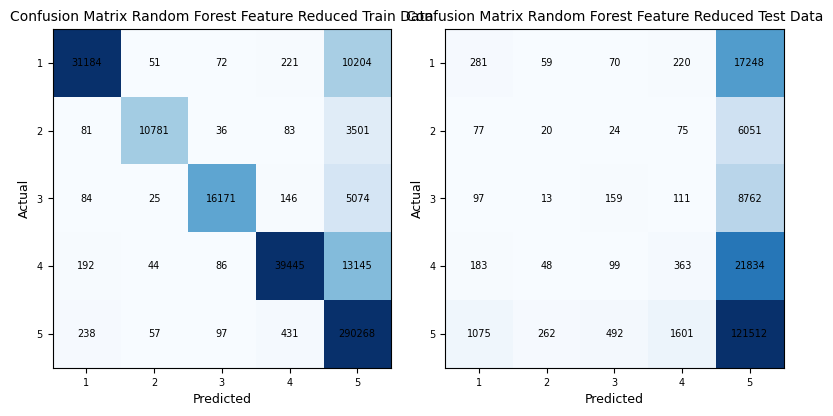

In [10]:
# Calculate confusion matrix
plt.figure(figsize=(8, 4))

# Calculate confusion matrix
cm = confusion_matrix(y_train, rf_y_pred_train)

print(cm)

# Plotting Confusion Matrix using imshow
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 30000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)
plt.title(f'Confusion Matrix Random Forest Feature Reduced Train Data', fontsize=10)

cm = confusion_matrix(y_test, rf_y_pred_test)

print(cm)
plt.subplot(1, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues, vmin = 0, vmax = 30000)

# Adding annotations
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', fontsize=7)

plt.xticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.yticks(np.arange(5), ['1', '2', '3', '4', '5'], fontsize=7)
plt.xlabel('Predicted', fontsize=9)
plt.ylabel('Actual', fontsize=9)

plt.title(f'Confusion Matrix Random Forest Feature Reduced Test Data', fontsize=10)
plt.tight_layout()
# plt.savefig('../../images/RFBestFeatRedConfMatrix.png')
plt.show()

In [21]:
import sys
sys.path.append('../data_cleaning/lem_stem_functions')

from text_functions_new_vocabs_ac import new_column_lemmatizer

from sklearn.feature_extraction.text import CountVectorizer

with open("../Classification/RFBestModel.pkl", "rb") as file:
    best_rf_model = pickle.load(file)

vectorizer = CountVectorizer()

user_review = pd.Series([input()])

lem_review = new_column_lemmatizer(user_review)
cv_review = vectorizer.fit_transform(lem_review)
review_features = pd.DataFrame(cv_review.toarray(), columns=vectorizer.get_feature_names_out())
user_result = best_rf_model.predict(review_features)
review_confidence = best_rf_model.predict_proba(review_features)
print('Model Prediction')
print(f'Class: {user_result}')
print(f'Confidence: {review_confidence}')

c:\Users\Scratticus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but RandomForestClassifier is expecting 26779 features as input.